# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

pprint(api_key)


'37c95f529459c0945afa7610e27fe796'


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Perform Weather Check For Loop
# ==============================================

# Create Base URL & Temp Units
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = '&units=imperial'

# Begin Data Log Printout
print("Beginning Data Retrieval")
print("-----------------------------")


# Create/Write CSV File

with open(output_data_file, mode= 'w',newline='') as csv_file:
    fieldnames = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']
    writer = csv.DictWriter(csv_file, fieldnames= fieldnames)
    writer.writeheader()
    
    count = 0
    Set = 1

    # Make successive API Calls to Open Weather API and Write them to 'cities.csv' 
    for City in cities:
        params = City + "&APPID=" + api_key + units
        city_data = requests.get(base_url + params).json()
        
        # Exception Handling for cities in the cities list but not in the API database
        try:
            
            print(f"Processing Record {count} of Set {Set} | {City.title()}")
            
            writer.writerow({'City': city_data['name'],'Cloudiness': city_data['clouds']['all'],
                            'Country': city_data['sys']['country'],'Date': city_data['dt'], 
                            'Humidity': city_data['main']['humidity'],'Lat': city_data['coord']['lat'],
                            'Lng': city_data['coord']['lon'],'Max Temp': city_data['main']['temp_max'],
                            'Wind Speed': city_data['wind']['speed']})

            count = count + 1
            if count % 50 == 0:
                Set = Set + 1
                count = 0
            
            
        except:
            
            print(f'Records for "{City.title()}" not found. Skipping...')
            
            
print('----------------------------')
print("Data Retrieval Complete")
print("----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | Catamarca
Records for "Catamarca" not found. Skipping...
Processing Record 0 of Set 1 | Jizan
Processing Record 1 of Set 1 | Vaini
Processing Record 2 of Set 1 | Palmerston
Processing Record 3 of Set 1 | Kudahuvadhoo
Processing Record 4 of Set 1 | Jamestown
Processing Record 5 of Set 1 | Khandyga
Processing Record 6 of Set 1 | Kinloss
Processing Record 7 of Set 1 | Malanje
Processing Record 8 of Set 1 | Aasiaat
Processing Record 9 of Set 1 | Chokurdakh
Processing Record 10 of Set 1 | Hihifo
Records for "Hihifo" not found. Skipping...
Processing Record 10 of Set 1 | Louisbourg
Records for "Louisbourg" not found. Skipping...
Processing Record 10 of Set 1 | Nome
Processing Record 11 of Set 1 | New Norfolk
Processing Record 12 of Set 1 | Provideniya
Processing Record 13 of Set 1 | Vestmannaeyjar
Processing Record 14 of Set 1 | Amga
Processing Record 15 of Set 1 | Longyearbyen
Processing Record 16 of Set 1

Processing Record 45 of Set 3 | Buta
Processing Record 46 of Set 3 | Shimoda
Processing Record 47 of Set 3 | Nikolskoye
Processing Record 48 of Set 3 | Victoria
Processing Record 49 of Set 3 | Olga
Processing Record 0 of Set 4 | Surt
Processing Record 1 of Set 4 | Sadon
Processing Record 2 of Set 4 | Alcudia
Processing Record 3 of Set 4 | North Bend
Processing Record 4 of Set 4 | Kamenskoye
Records for "Kamenskoye" not found. Skipping...
Processing Record 4 of Set 4 | Luderitz
Processing Record 5 of Set 4 | Pali
Processing Record 6 of Set 4 | Sinazongwe
Processing Record 7 of Set 4 | Puerto Escondido
Processing Record 8 of Set 4 | Kuche
Records for "Kuche" not found. Skipping...
Processing Record 8 of Set 4 | Bubaque
Processing Record 9 of Set 4 | Birao
Processing Record 10 of Set 4 | Tuktoyaktuk
Processing Record 11 of Set 4 | San Patricio
Processing Record 12 of Set 4 | Katsuura
Processing Record 13 of Set 4 | College
Processing Record 14 of Set 4 | Attawapiskat
Records for "Attawapi

Processing Record 1 of Set 7 | Bollnas
Processing Record 2 of Set 7 | Calabar
Processing Record 3 of Set 7 | Sitka
Processing Record 4 of Set 7 | Banjarmasin
Processing Record 5 of Set 7 | Youkounkoun
Processing Record 6 of Set 7 | Nara
Processing Record 7 of Set 7 | Bathsheba
Processing Record 8 of Set 7 | Jahrom
Records for "Jahrom" not found. Skipping...
Processing Record 8 of Set 7 | Klyuchi
Processing Record 9 of Set 7 | Srednekolymsk
Processing Record 10 of Set 7 | Altenholz
Processing Record 11 of Set 7 | Wiarton
Processing Record 12 of Set 7 | Taksimo
Processing Record 13 of Set 7 | Mosquera
Processing Record 14 of Set 7 | Pontes E Lacerda
Processing Record 15 of Set 7 | Laguna
Processing Record 16 of Set 7 | Letlhakane
Processing Record 17 of Set 7 | Hovd
Processing Record 18 of Set 7 | Auki
Processing Record 19 of Set 7 | Ardistan
Records for "Ardistan" not found. Skipping...
Processing Record 19 of Set 7 | Dali
Processing Record 20 of Set 7 | Kadykchan
Records for "Kadykchan

Processing Record 18 of Set 10 | Yamada
Processing Record 19 of Set 10 | Abha
Processing Record 20 of Set 10 | Kondinskoye
Processing Record 21 of Set 10 | Sterling
Processing Record 22 of Set 10 | Geraldton
Processing Record 23 of Set 10 | Kisangani
Processing Record 24 of Set 10 | Anloga
Processing Record 25 of Set 10 | Bilibino
Processing Record 26 of Set 10 | Prieska
Processing Record 27 of Set 10 | Ajdovscina
Processing Record 28 of Set 10 | Wewak
Processing Record 29 of Set 10 | Mount Isa
Processing Record 30 of Set 10 | Alliston
Processing Record 31 of Set 10 | Hofn
Processing Record 32 of Set 10 | Beian
Processing Record 33 of Set 10 | Shelburne
Processing Record 34 of Set 10 | Marsa Matruh
Processing Record 35 of Set 10 | Daru
Processing Record 36 of Set 10 | Kiunga
Processing Record 37 of Set 10 | Villarrica
Processing Record 38 of Set 10 | Priyutovo
Processing Record 39 of Set 10 | Benguela
Processing Record 40 of Set 10 | Cruzilia
Processing Record 41 of Set 10 | Esperance


In [5]:
# Test Call Code
# =====================

# '''query_url = base_url + City + '&APPID=' + api_key + units

# test_call = requests.get(base_url + "Raleigh" + '&APPID=' + api_key + units).json()

# pprint(test_call)
# print('')
# print('----------')
# print(f"Cloudiness in Raleigh is {test_call['clouds']['all']}")    
    
        
        
# print(cities[-1])''';

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Read the CSV with Pandas to Create a DataFrame

city_weather_df = pd.read_csv("cities.csv")
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jizan,40,SA,1569978935,88,16.89,42.56,77.00,6.93
1,Vaini,75,IN,1569978828,100,15.34,74.49,68.00,1.39
2,Palmerston,40,AU,1569979063,58,-12.49,130.99,90.00,8.05
3,Kudahuvadhoo,100,MV,1569978944,76,2.67,72.89,82.25,16.44
4,Jamestown,0,AU,1569978796,18,-33.21,138.60,80.31,16.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

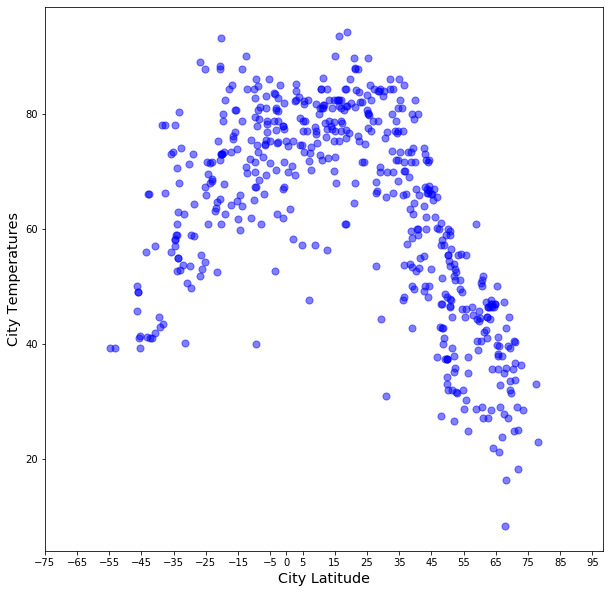

In [49]:
# Plot Latitude vs. Temperature
# =============================

# Change the Figure Size
fig, ax = plt.subplots(figsize=(10,10))

# Create Variables for the Series
lat = city_weather_df["Lat"]
temp = city_weather_df["Max Temp"]

# Set x limits
ax.set_xlim(lat.min() - 20, lat.max() + 20)

# Set x ticks
ax.set_xticks([round(x) for x in np.arange(lat.min() - 20, lat.max() + 20, step= 10)] + [0])

# Create the x & y labels
ax.set_xlabel("City Latitude", size= "x-large")
ax.set_ylabel("City Temperatures", size= "x-large")

# Plot the Series
ax.scatter(lat, temp, color= "b", marker="o", s= 50, alpha=.5)

plt.show()


#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot